# Machine Learning Lab one

## Team member: Xinqun Ye, Meixi Huo, Qixuan Wang, Han Deng.

## PART 1

### 1. Business Understanding


we found this dataset from https://archive.ics.uci.edu/ml/datasets/Cardiotocography.  
From the description of the dataset: “2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.”  The dataset have 23 attributes including the baseline of fetal heart rate and the uterine contractions which are indicators of the fetal state. The fetal state is defined as 3 class. N is to represent normal, S represent suspect and P represent pathologic. So we can use dataset to train a model which can predict the fetal state according to the cardiotocograms data.


  It is our first choice because we want to research some disease problem and the direction of health care. We believe that people are paying more and more attention to their health. So it has more commercial value if it is well-demonstrated. The situation of a pregnant female when they are about to delivery a baby is very serve and need to be taken good care of. CTG is a technical means of recording the fetal heartbeat and uterine contractions during pregnancy. Listening and recording the baby's heartbeat aims to identify babies who are becoming short of oxygen and may benefit from an early delivery by caesarean section or instrumental vaginal birth.[ Continuous cardiotocography (CTG) as a form of electronic fetal monitoring (EFM) for fetal assessment during labour] And it is widely use to assess fetal wellbeing. A review found that computerized CTG machines resulted in lower numbers of baby deaths than the traditional CTG machines.[from Wikipedia] So we want to use this dataset to train a model that can analyze the CTG data and predict the fetal state.  

  Our training model is useful to identity to the fetal state which may help the obstetricians make specific clinical decisions. When the fetus is predicted a high risk, this model will aid communication and timely delivery.[1]


### measure of success


if the algorithm is successful, it should have a high accuracy to predict the right fetal state.   It is about the new life and the safety of the pregnant women. Everything need to be very careful.  
Third party like obstetrics and gynecology hospital and pregnant woman will be interested in it. 
For obstetrics hospital, It is important that it can deal with real-time data. It is difficult for a experts to look at the recordings all the time and analyze if there is abnormal situation.  The system should also analyze the outcome faster than the obstetricians. In this way can obstetricians and caesarean section get prepared quickly. 

It is also worthy of trial and application by pregnant women. Sometimes it is hard for pregnant women to distinguish the fetal state, especially for those who do not have the experience of delivery.  So a machine learning system like this can predict the fetal state even if sometimes the obstetricians is not around. it can be a good guidance for pregnant woman to realize the situation.

Due to our test. Our model has accurancy of 0.94. which means only 6 cases fail in 100. That is acceptable if it take the normal state(N) as a pathologic state(P). but if it takes  the pathologic state(P) as a normal state(N), it may cause big problem and  threaten life. 


## PART 2

In [1]:
import pandas as pd
import numpy as py
df=pd.read_excel(open('CTG.xls','rb'),sheet_name="Data")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 41 columns):
b           2126 non-null int64
e           2126 non-null int64
AC          2126 non-null int64
FM          2126 non-null int64
UC          2126 non-null int64
DL          2126 non-null int64
DS          2126 non-null int64
DP          2126 non-null int64
LB          2126 non-null int64
AC.1        2126 non-null float64
FM.1        2126 non-null float64
UC.1        2126 non-null float64
DL.1        2126 non-null float64
DS.1        2126 non-null float64
DP.1        2126 non-null float64
ASTV        2126 non-null int64
MSTV        2126 non-null float64
ALTV        2126 non-null int64
MLTV        2126 non-null float64
Width       2126 non-null int64
Min         2126 non-null int64
Max         2126 non-null int64
Nmax        2126 non-null int64
Nzeros      2126 non-null int64
Mode        2126 non-null int64
Mean        2126 non-null int64
Median      2126 non-null int64
Variance    2

Data understanding:
	There are 23 features in this dataset (including the feature that we are going to predict), and I’m going to describe each data and define them with different data types, and I will explain why we assign them with their corresponding data type.
	For the features from AC to DP, because they are basically representing the same data as features from AC.1 to DP.1 (AC/60=AC.1), so I don’t describe these data, and the data type for AC to DP are all integer.
1.	b (integer): start instant.
2.	e (integer): end instant.
3.	LB (Integer):  FHR baseline (beats per minute), FHR means fetal heart rate, and FHR usually ranges from 120 to 160 beats per minute. And this data is represented by integer in hospital’s record, so we assign integer to represent this feature.
4.	AC.1 (float): the number of accelerations per second. Because acceleration phenomenon is usually not occurred regularly, so the value of this feature is usually smaller than 1, and that’s the reason why we use floating number to represent this feature.
5.	FM.1 (float): the number of fetal movements per second. Fetal movement is not occurred regularly (like AC), so usually the value of this feature is not an integer, so we use floating number to represent this feature.
6.	UC.1 (float): the number of uterine contractions per second. Uterine contraction is also not occurred regularly, so usually the value of this feature is not an integer, so we use floating number to represent it.
7.	DL.1 (float): the number of light decelerations per second. Which represent the number of heart beat rate is transformed from high frequency to low frequency, but the change is not very obvious (that is what the ‘light’ means). And it is not occurred very frequently (value is close to 0), so we use floating number to represent it.
8.	DS.1 (float): the number of severe decelerations per second. This data also means the frequency of heart beat rate is transformed from high rate to low rate, and the change is obvious (that is what the ‘severe’ means). Because the frequency of this phenomenon is very low (lower than DL), so we use floating number to represent this feature.
9.	DP.1 (float): number of prolonged decelerations per second. Prolonged deceleration means the heart beats rate deceleration time is abnormally long, which is nor occurs regularly, so we use floating number to represent it.
10.	ASTV (integer): percentage of time with abnormal short-term variability. Because this data is ranging from 0 to 100 (100%), so we use integer to represent it.
11.	MSTV (float): mean value of short-term variability. Most value of this feature is range from 0 to 10, which means we can’t ignore the decimal part, so we use floating number to represent it.
12.	ALTV (integer): percentage of time with abnormal long-term variability. This data represents the part of time with abnormal long variability in percentage, and the hospital’s record represent it in integer, so we use integer to represent it.
13.	MLTV (float): mean value of long-term variability. This value records the number of variabilities through long-term observation, and according to the hospital’s record, we keep both decimal part and integer part and use floating number to represent this data.
14.	Width (integer): width of FHR histogram. Because this data represents the width of FHR (fetal heart rate), so we represent it by integer.
15.	Min (integer): minimum of FHR histogram. This data represents the minimum value of the FHR histogram, since all FHR value is represented in integer, we will represent this value with integer.
16.	Max (integer): maximum of FHR histogram. This data represents the maximum value of the FHR histogram, since all FHR value is represented in integer, we will represent it with integer.
17.	Nmax (integer): number of peaks in FHR histogram. The number of peak values in FHR histogram, represent in integer.
18.	Nzeros (integer): number of zero in FHR histogram. This data represents the occurrence number of zero value in FHR histogram, which is represented in integer.
19.	Mode (integer): histogram mode.
20.	Mean (integer): the mean value for all the value in histogram.
21.	Median (integer): the median value of for all the value in histogram.
22.	Variance (integer): this data represents the histogram variance.
23.	Tendency (integer): this data represents the histogram tendency. 
24.	CLASS (integer): this data represents the FHR pattern class code (from 1 to 10), so we represent it in integer.
25.	NSP (integer): this data represents the fetal state class code, in the hospital’s record, they use N to represent normal, S represent suspect and P represent pathologic. So we can use char to represent this feature, but for the convenience of further analysis, we assign different integer code for them, 0 represent normal, 1 represent suspect and 2 represent pathologic, and this feature is the feature that we are going to predict.


In [17]:
import matplotlib
import missingno as mn
import pandas as pd
import numpy as np

%matplotlib inline 
#mn.matrix(df)
df=pd.read_excel(open('Downloads/CTG.xls','rb'),sheet_name="Data")

file = df.iloc[:2126,:]
file.to_csv("file_result.csv")

Date Quality:
	In this part, I will verify data quality. The first thing to do is find out if there are any missing value or duplicate data, so I use data.info() function to show the basic information of this dataset, the result describe the total number of each feature and the corresponding data type of this data. According to the result we can see that the total number of data for each feature in this dataset are all the same which is 2126, which means there are no missing data, we also use mn.matrix function (which is in missingno package) to visualize the dataset and the figure also shows there is no missing data.
	After dealing with missing data, the second step is to find out if there are any wrong data (for example, 999 years old in a dataset that we saw in class). In order to find such wrong data, we need to know the normal range of each feature and see if any data of this feature is abnormally bigger or smaller than the normal range.
1.	LB: According to our search, the normal range of FHR baseline, is 110 to 160 rpm. In our dataset, the minimum value of this feature is 106, and the maximum value of this feature is 160, which means there is no wrong data in this feature.
2.	AC: According to our search, the normal range of number of accelerations per second is 0.002. In our dataset, the minimum value of this feature is 0, the maximum value of this feature is 0.0193, and the mean value is 0.00317. which means there is no wrong data in this feature.
3.	CLASS: Because CLASS represent the FHR pattern class code, so the range of this feature is from 1 to 10, and in our dataset, the minimum value of this feature is 1, maximum value of this feature is 10, which means there is no wrong data in this feature.
4.	NSP: Because this feature represents the fetal state class node, and the hospital’s record assign three value to represent it, 1 means normal, 2 means suspect and 3 means pathologic. The maximum value of this feature is 3, and the minimum is 1, which means there is no wrong data in this feature.
For other features in this dataset, there are no standard normal range to judge whether all the data of this feature is right, so we compare the maximum value and minimum value with the mean value of this feature, and there is no wrong data or unrealistic data for other features.
There is the link of standard range for some feature
https://thewomens.r.worldssl.net/images/uploads/downloadable-records/clinical-guidelines/ctg-interpretation-and-response_160517.pdf


## PART 3

This part is about data visualization.

In [4]:
import pandas as pd
df = pd.read_excel(open('data/CTG.xls','rb'), sheet_name = 'Data')
df = df.iloc[:2126,:]
del df['Unnamed: 9']
del df['Unnamed: 31']
del df['Unnamed: 42']
del df['Unnamed: 44']
df

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0
5,0.0,953.0,1.0,0.0,10.0,9.0,0.0,2.0,0.0,134.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,8.0,3.0
6,240.0,953.0,1.0,0.0,9.0,6.0,0.0,2.0,0.0,134.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,8.0,3.0
7,62.0,679.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,3.0
8,120.0,779.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,122.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,3.0
9,181.0,1192.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,122.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,3.0


In [5]:
data = df[['b','e','AC','FM','UC','DL','DS','DP','DR','LB','AC.1','FM.1','UC.1','DL.1','DS.1','DP.1','ASTV','MSTV','ALTV','MLTV','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency','NSP']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 42 columns):
b           2126 non-null float64
e           2126 non-null float64
AC          2126 non-null float64
FM          2126 non-null float64
UC          2126 non-null float64
DL          2126 non-null float64
DS          2126 non-null float64
DP          2126 non-null float64
DR          2126 non-null float64
LB          2126 non-null float64
AC.1        2126 non-null float64
FM.1        2126 non-null float64
UC.1        2126 non-null float64
DL.1        2126 non-null float64
DS.1        2126 non-null float64
DP.1        2126 non-null float64
ASTV        2126 non-null float64
MSTV        2126 non-null float64
ALTV        2126 non-null float64
MLTV        2126 non-null float64
Width       2126 non-null float64
Min         2126 non-null float64
Max         2126 non-null float64
Nmax        2126 non-null float64
Nzeros      2126 non-null float64
Mode        2126 non-null float64
Mean     

In [6]:
df.describe()

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,878.439793,1702.877234,2.722484,7.241298,3.659925,1.570085,0.003293,0.126058,0.0,133.303857,...,-0.950141,-0.923801,-0.932267,-0.687676,-0.762935,-0.899341,-0.935089,-0.814675,4.509878,1.304327
std,894.084748,930.919143,3.560850,37.125309,2.847094,2.499229,0.057300,0.464361,0.0,9.840844,...,0.311894,0.382964,0.361856,0.726188,0.646627,0.437350,0.354495,0.580054,3.026883,0.614377
min,0.000000,287.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,106.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,55.000000,1009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,126.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,1.000000
50%,538.000000,1241.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,133.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,1.000000
75%,1521.000000,2434.750000,4.000000,2.000000,5.000000,3.000000,0.000000,0.000000,0.0,140.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,7.000000,1.000000
max,3296.000000,3599.000000,26.000000,564.000000,23.000000,16.000000,1.000000,4.000000,0.0,160.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


In [7]:
target = data.NSP
target.dtype
file = data.describe()
file.to_csv("save_result.csv")

### The package missingno enables us to find which attribute has miss data, from the image, we can find there is no missing data.

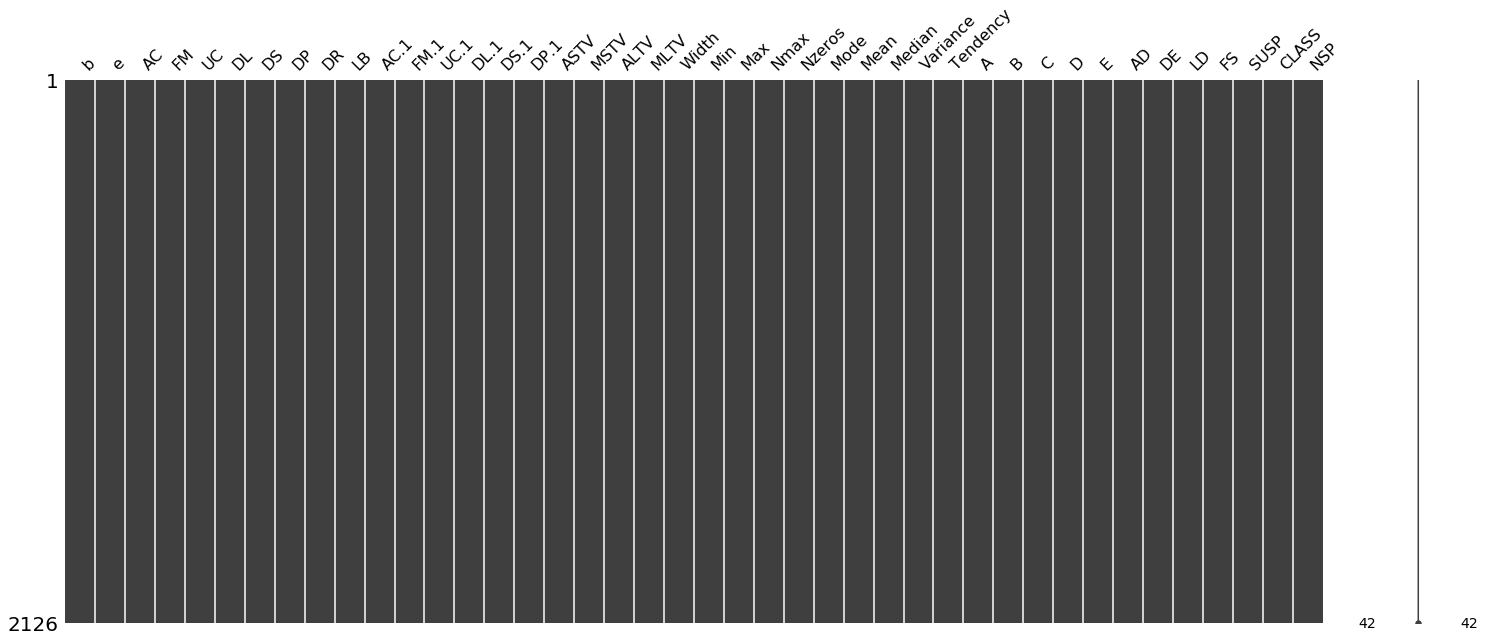

In [8]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df.sort_values(by=['AC','FM','UC','DL','DS','DP','DR','LB']))

### This part shows the Frequency, Density distribution of LB attribute, using Histogram and KDE
Histogram
* Usually shows the distribution of values of a single variable
* Divide the values into bins and show a bar plot of the number of objects in each bin.

KDE
* Add up Gaussian underneath each point value
* STD of gaussian is equivalent to number of bins in histogram

from the distribution, the distribution is similar with normal distribution, and these data concentrate on 130.

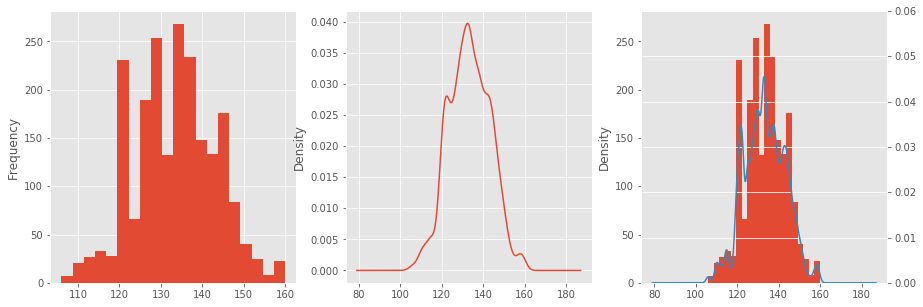

In [9]:
# Start by just plotting what we previously grouped!
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
data.LB.plot.hist(bins=20)

plt.subplot(1,3,2)
data.LB.plot.kde(bw_method=0.2)

plt.subplot(1,3,3)
data.LB.plot.hist(bins=20)
data.LB.plot.kde(bw_method=0.1, secondary_y=True)
plt.ylim([0, 0.06])

plt.show()

### Two-Dimensional Distributions¶
We can find the joint distribution between UC.1 and LB

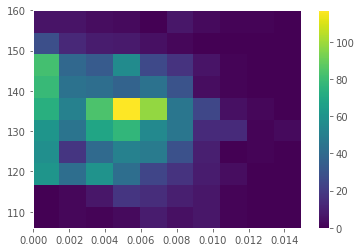

In [10]:
plt.hist2d(x=data['UC.1'], y=data.LB.values)
plt.colorbar()
plt.show()

### Here, we take 6 sttributes, include 'AC.1','FM.1','UC.1','DL.1','DS.1','DP.1' to calculate the correlation and show the image between each attribute. We can find DP.1, FM.1, DL.1 and UC.1 have such higher correlation. And other attributes have lower correlation. Hence, we can conclude that these attribute are maybe independence with each other.

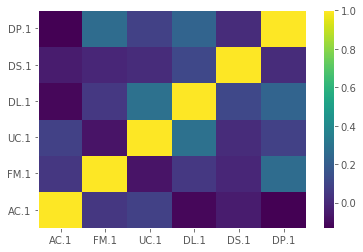

In [11]:
import numpy as np
vars_to_use = ['AC.1','FM.1','UC.1','DL.1','DS.1','DP.1']# pick vars
plt.pcolor(data[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()


### This image shows that distribution between each two attributes.

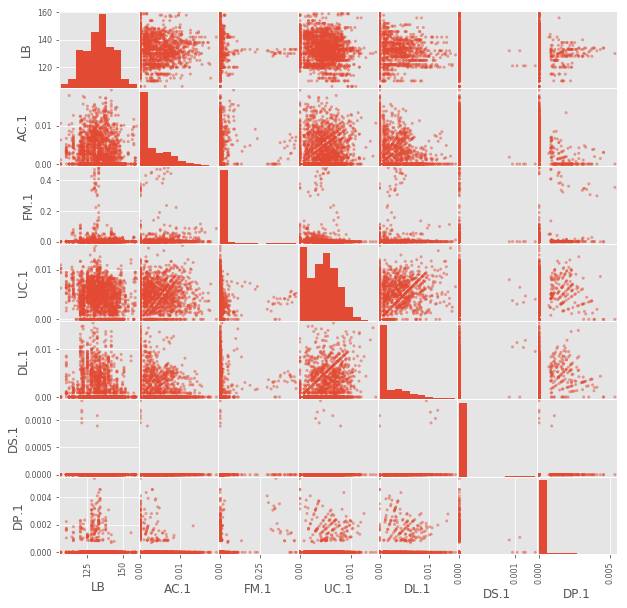

In [12]:
from pandas.plotting import scatter_matrix

vars_to_use = ['LB','AC.1','FM.1','UC.1','DL.1','DS.1','DP.1']# pick vars

# NOT A GOOD PLOT, it needs jitter to make the categorical attributes better visualized
ax = scatter_matrix(data[vars_to_use],figsize=(10, 10))

# also we need some type of subset selection, this is just too much data


### The ASTV's distribution between each class.

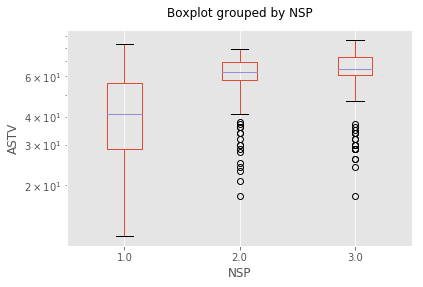

In [13]:
ax = data.boxplot(column='ASTV', by = 'NSP') # group by class
plt.ylabel('ASTV')
plt.title('')
ax.set_yscale('log')

In [14]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

print('Seaborn:', sns. __version__)

Seaborn: 0.9.0


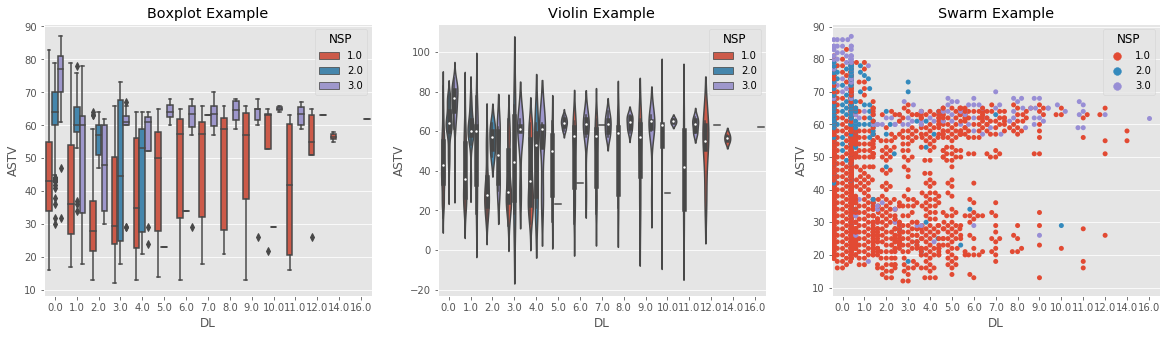

In [15]:
# sns boxplot
plt.subplots(figsize=(20, 5))

plt.subplot(1,3,1)
sns.boxplot(x='DL', y='ASTV', hue="NSP", data=data)
plt.title('Boxplot Example')

plt.subplot(1,3,2)
sns.violinplot(x='DL', y='ASTV', hue="NSP", data=data)
plt.title('Violin Example')

plt.subplot(1,3,3)
sns.swarmplot(x='DL', y='ASTV', hue="NSP", data=data)
plt.title('Swarm Example')

plt.show()

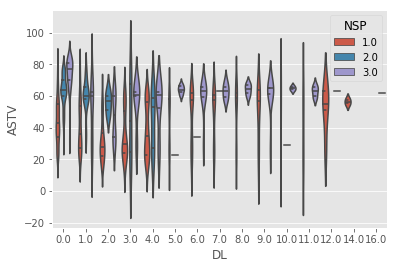

In [16]:

sns.violinplot(x='DL', y='ASTV', hue="NSP", data=data, 
             inner="quart")

plt.show()

### Here we calculate the correlation between all of the attributes. We can find AC, FM, UC, DL, DS, DP and AC.1, FM.1, UC.1, DL.1, DS.1, DP.1 have high correlation more than 0.8. According to the PART 2, the AC.1, FM.1, UC.1, DL.1, DS.1, DP.1  can be calculated from AC, FM, UC, DL, DS, DP., so we can remove these attribute. After we remove these attributes, we found these attributes have lower correlation.

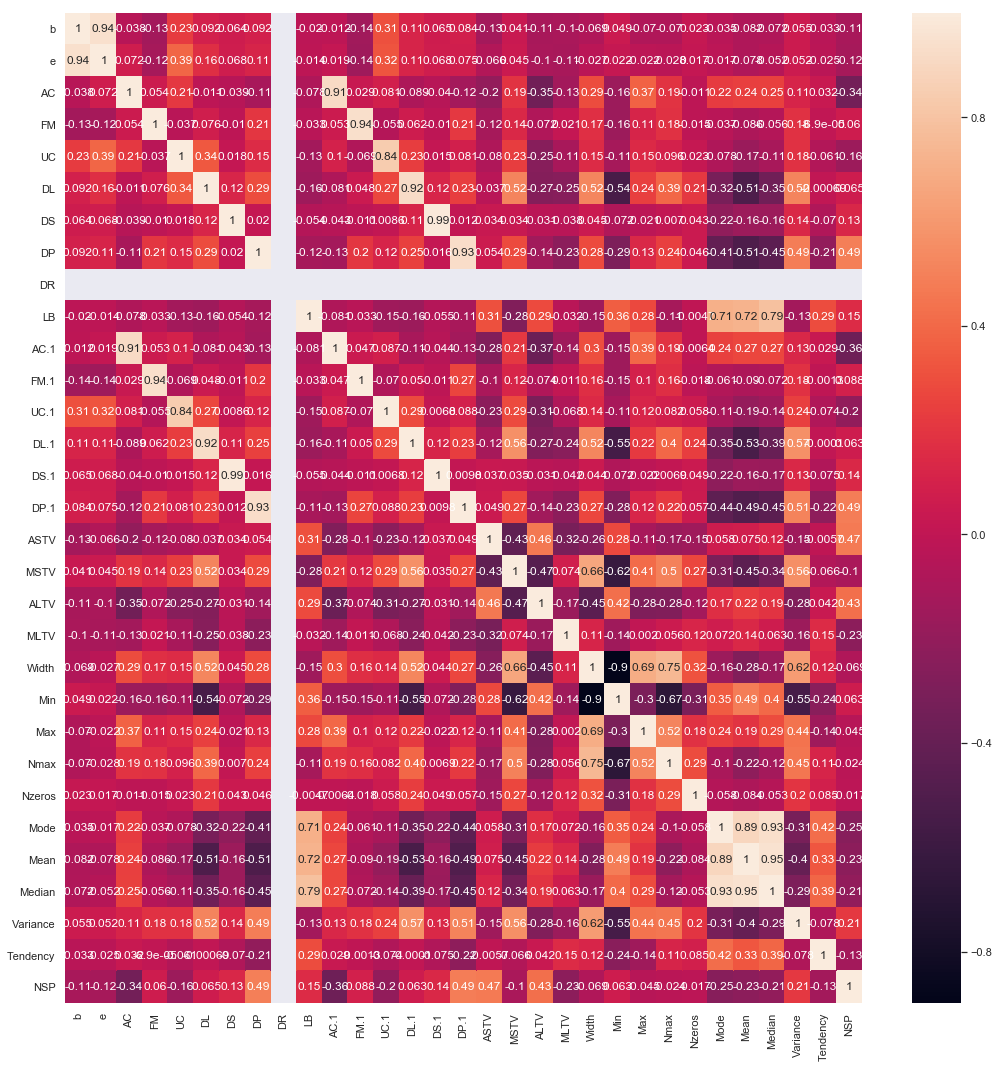

In [17]:
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

vars_to_use = ['b','e','AC','FM','UC','DL','DS','DP','DR','LB','AC.1','FM.1','UC.1','DL.1','DS.1','DP.1','ASTV','MSTV','ALTV','MLTV','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency','NSP']
fdata = data[vars_to_use]

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(fdata.corr(), cmap=cmap, annot=True)

f.tight_layout()

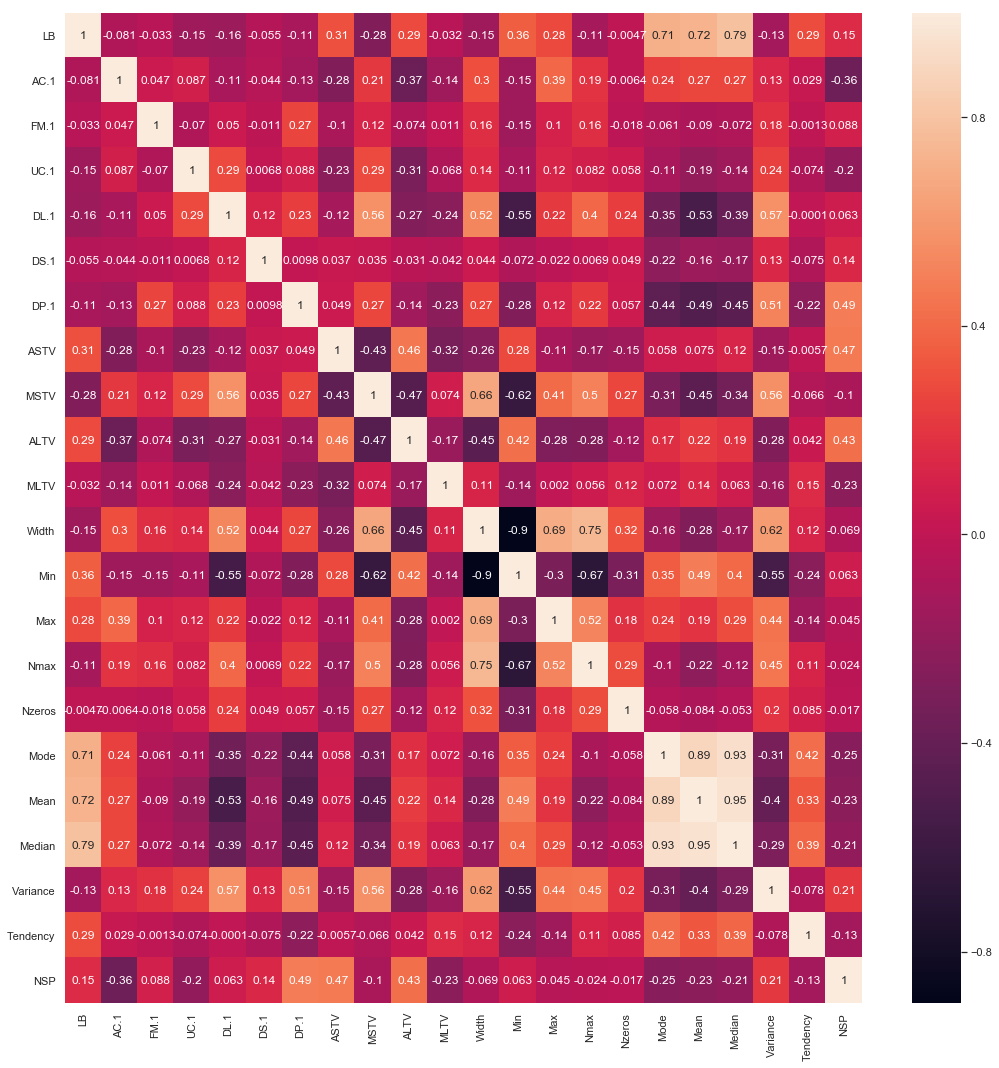

In [19]:
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

vars_to_use = ['LB','AC.1','FM.1','UC.1','DL.1','DS.1','DP.1','ASTV','MSTV','ALTV','MLTV','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency','NSP']
fdata = data[vars_to_use]

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(fdata.corr(), cmap=cmap, annot=True)

f.tight_layout()

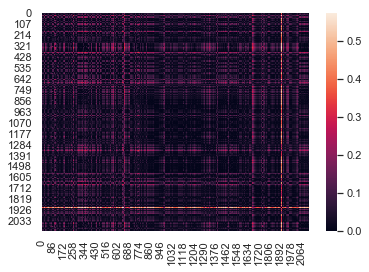

In [20]:
from sklearn.metrics.pairwise import pairwise_distances

vars_to_use_old = ['b','e','AC','FM','UC','DL','DS','DP','DR','LB','AC.1','FM.1','UC.1','DL.1','DS.1','DP.1','ASTV','MSTV','ALTV','MLTV','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency','NSP']
# pick vars
vars_to_use = ['LB','AC.1','FM.1','UC.1','DL.1','DS.1','DP.1','ASTV','MSTV','ALTV','MLTV','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency','NSP']


xdata = pairwise_distances(data[vars_to_use].values, metric='correlation')
sns.heatmap(xdata, cmap=cmap, annot=False)


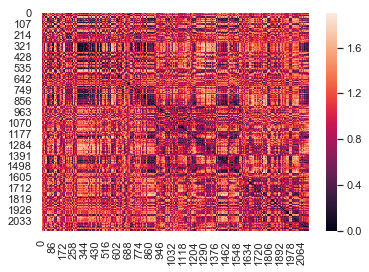

In [21]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

xdata = pairwise_distances(std.fit_transform(data[vars_to_use].values), metric='correlation')
sns.heatmap(xdata, cmap=cmap, annot=False)

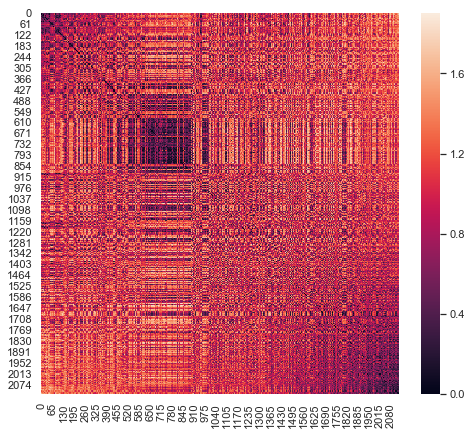

In [34]:
f, ax = plt.subplots(figsize=(8, 7))


std = StandardScaler()

data_copy = data.copy().sort_values(by=['AC.1','LB','NSP'])

xdata = pairwise_distances(std.fit_transform(data_copy[vars_to_use].values), metric='correlation')
sns.heatmap(xdata, cmap=cmap, annot=False)

### We use DecisionTree Algorithms to calculate the accuracy score, finding that we choose 40% to test and 60% to train model, the accuracy score of result is about 94%. So that this dataset maybe a good data.

In [79]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data[['b','e','AC','FM','UC','DL','DS','DP','DR','LB','AC.1','FM.1','UC.1','DL.1','DS.1','DP.1','ASTV','MSTV','ALTV','MLTV','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency']]
Y = data.NSP
clf = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
clf = clf.fit(X_train, y_train)
#y_train
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9377203290246768

## PART 4

### tSNE medthod

tSNE stand as t-Distributed Stochastic Neighbor Embedding. It is a tool to visualize high-dimensional data into low-dimensional data, like two- or three-dimensional. The basic idea of tSNE is to represent similar objects in high-dimensional by nearby low-dimensional points and represent dissimilar objects in high-dimensional by distant low -dimensional points.

### How tSNE works

First, measure the local similarities between points in high-dimensional, local similarities means we are only going to look at the similarities to nearby points. The way we measure the similarities between the points is first we pick up a point in high-dimensional, and we center a Gaussian distribution over this point, then we are going to measure the probability density of all other points under this Gaussian using this function:

$$p_{j|i}=\frac{exp(-\frac{(\|x_i-x_j\|)^2}{2\sigma^{2}_{i}})}{\sum_{k\neq{i}}exp(-\frac{(\|x_i-x_k\|)^2}{2\sigma^{2}_{i}})}$$

By doing this, we will get a set of probabilities which basically measure the similarity between pairs of points. If two points are close in the original high-dimensional space the value of $p_{j|i}$ will be large and if the two points are far from each other in the high-dimensional space, the value of $p_{j|i}$ will be basically infinitesimal. And since the Gaussian has a fixed perplexity, we will not normalize over all pairs of points, we will only measure the point within the bandwidth we give to the point at the beginning.
Also, for the pair of points $p_i$ and $p_j$ , we are going to get the symmetrized version of the conditionals, which is:


$$p_{ij}=\frac{p_{j|i}+p_{i|j}}{2}$$

After measure the similarities in the high-dimensional space, we are going to represent each high-dimensional object by a point in the low-dimensional space. What we need is that the similarities we compute in the low-dimensional space reflect the similarities in the high-dimensional space as well as possible. To do this, we will also set a kernel to a point and measure the density of all the other point under this distribution, and then we are going to re-normalize the similarity. The kernel used in the low-dimensional space is not a Gaussian kernel, is a Student-t distribution which makes the function look like this:

$$q_{ij}=\frac{(1+\|y_i-y_j\|^2)^{-1}}{\sum_{k=i}{(1+\|y_k-y_l\|^2)^{-1}}}$$

The reason we use the Student-t distribution is that when we embedding high-dimensional data into low-dimensional maps, we want the dissimilar points to be far apart in the low-dimensional map. This heavy tailed distribution allows this to happen.

After we compute the $p_{ij}$ in high-dimensional space and the $q_{ij}$ in the low-dimensional space, we need a method to measure the difference between these two values to see if we have a good embedding. The way we measure the difference between these two probability distribution is using Kullback-Leibler divergence and it is given by:

$$C=KL(P\|Q)=\sum_{i}\sum_{j\neq{i}}p_{ij}\log{\frac{p_{ij}}{q_{ij}}}$$

This Kullback-Leibler divergence allow us to lay out the points in the low-dimensional space and make them reflect the similarities of high-dimensional space as well as possible which means that for each pair points this Kullback-Leibler divergence is minimized. In order to do that, we are going to do gradient descent in the Kullback-Leibler divergence, which boils down to just moving the points around in such a way that this Kullback-Leibler divergence becomes small.

And the way we move a single point in the map in order to get a lower Kullback-Leibler divergence is by using this function:

$$\frac{\partial{C}}{\partial{y_i}}=4\sum_{j\neq{i}}(p_{ij}-q_{ij})(y_i-y_j)(1+\|y_i-y_j\|^2)^{-1}$$

### Implement tSNE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import time
from sklearn import manifold

In [16]:
df = pd.read_excel(open('CTG.xls','rb'),sheet_name = 'Data')
df = df.dropna(axis = 1, how = 'all')
df = df.dropna(axis = 0, how = 'any')

In [17]:
df = df.values

In [29]:
X = df[0:].T
y = np.zeros(2126)
for i in range(0,2126):
    y[i] = i
print(X.dtype)
print(X.shape)
print(X)

float64
(42, 2126)
[[ 2.400e+02  5.000e+00  1.770e+02 ...  1.576e+03  1.576e+03  2.796e+03]
 [ 3.570e+02  6.320e+02  7.790e+02 ...  2.596e+03  3.049e+03  3.415e+03]
 [ 0.000e+00  4.000e+00  2.000e+00 ...  1.000e+00  1.000e+00  1.000e+00]
 ...
 [-1.000e+00 -1.000e+00 -1.000e+00 ... -1.000e+00 -1.000e+00 -1.000e+00]
 [ 9.000e+00  6.000e+00  6.000e+00 ...  5.000e+00  5.000e+00  1.000e+00]
 [ 2.000e+00  1.000e+00  1.000e+00 ...  2.000e+00  2.000e+00  1.000e+00]]


In [30]:
X1 = X[9:30]
X2 = X[40:]
X = np.vstack((X1, X2)).T
print(X.shape)
print(X.dtype)
print(X)

(2126, 23)
float64
[[1.20000000e+02 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  9.00000000e+00 2.00000000e+00]
 [1.32000000e+02 6.37958533e-03 0.00000000e+00 ... 0.00000000e+00
  6.00000000e+00 1.00000000e+00]
 [1.33000000e+02 3.32225914e-03 0.00000000e+00 ... 0.00000000e+00
  6.00000000e+00 1.00000000e+00]
 ...
 [1.40000000e+02 9.80392157e-04 0.00000000e+00 ... 1.00000000e+00
  5.00000000e+00 2.00000000e+00]
 [1.40000000e+02 6.78886626e-04 0.00000000e+00 ... 1.00000000e+00
  5.00000000e+00 2.00000000e+00]
 [1.42000000e+02 1.61550889e-03 1.61550889e-03 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]]


In [31]:
n_samples = X.shape
n_features = X.shape
n_neighbors = 30

In [32]:
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, perplexity=30)
t0 = time()
X_tsne = tsne.fit_transform(X).T
print(X_tsne.shape)
print(X_tsne)

Computing t-SNE embedding
(2, 2126)
[[ 20.071758  -18.52462   -18.53253   ...  -6.16618    -6.1466947
   -1.5986842]
 [ 42.468067   40.759285   40.76178   ...  -9.316162   -9.302801
  -52.482803 ]]


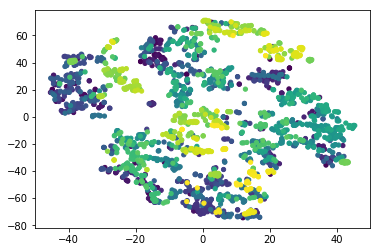

In [33]:
plt.scatter(X_tsne[0], X_tsne[1], s=18, c=y, alpha=1)
plt.show()

### Reference
[1]https://opentsne.readthedocs.io/en/latest/tsne_algorithm.html

[2]https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE

[3]L.J.P. van der Maaten and G.E. Hinton. Visualizing High-Dimensional Data Using t-SNE. Journal of Machine Learning Research 9(Nov):2579-2605, 2008.

[4]https://lvdmaaten.github.io/tsne/